<a href="https://colab.research.google.com/github/hfwalvir/Python-PortfolioProjects/blob/main/Housing_Prices_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("TensorFLow version : "+tf.__version__)
print("TensorFlow Decision Forests version :"+tfdf.__version__)

TensorFLow version : 2.16.1
TensorFlow Decision Forests version :1.9.1


In [ ]:
train_data = pd.read_csv(r"/content/train.csv")
print("Shape of Full training dataset is {}".format(train_data.shape))

Shape of Full training dataset is (1460, 81)


In [ ]:
train_data.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data_df = train_data.drop('Id',axis=1)
train_data_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# **HOUSE PRICES DISTRIBUTION**

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-9-67977654c814>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data_df['SalePrice'],color='r',bins=100,hist_kws={'alpha':0.4});


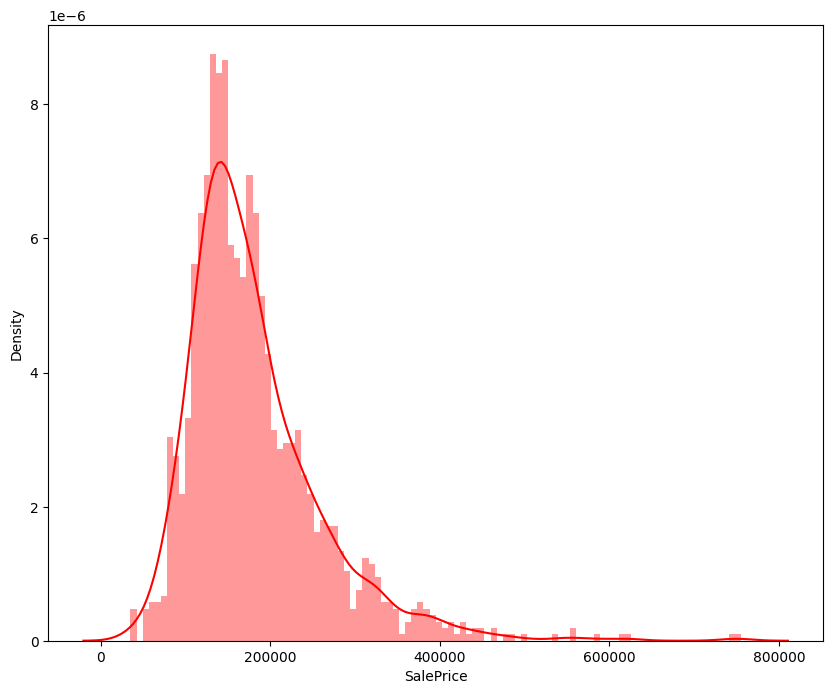

In [ ]:
print(train_data_df['SalePrice'].describe())
plt.figure(figsize=(10,8))
sns.distplot(train_data_df['SalePrice'],color='r',bins=100,hist_kws={'alpha':0.4});

# **NUMERICAL DATA DISTRIBUTION**

In [ ]:
list(set(train_data_df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [ ]:
numerical_data = train_data_df.select_dtypes(include=["float64","int64"])
numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

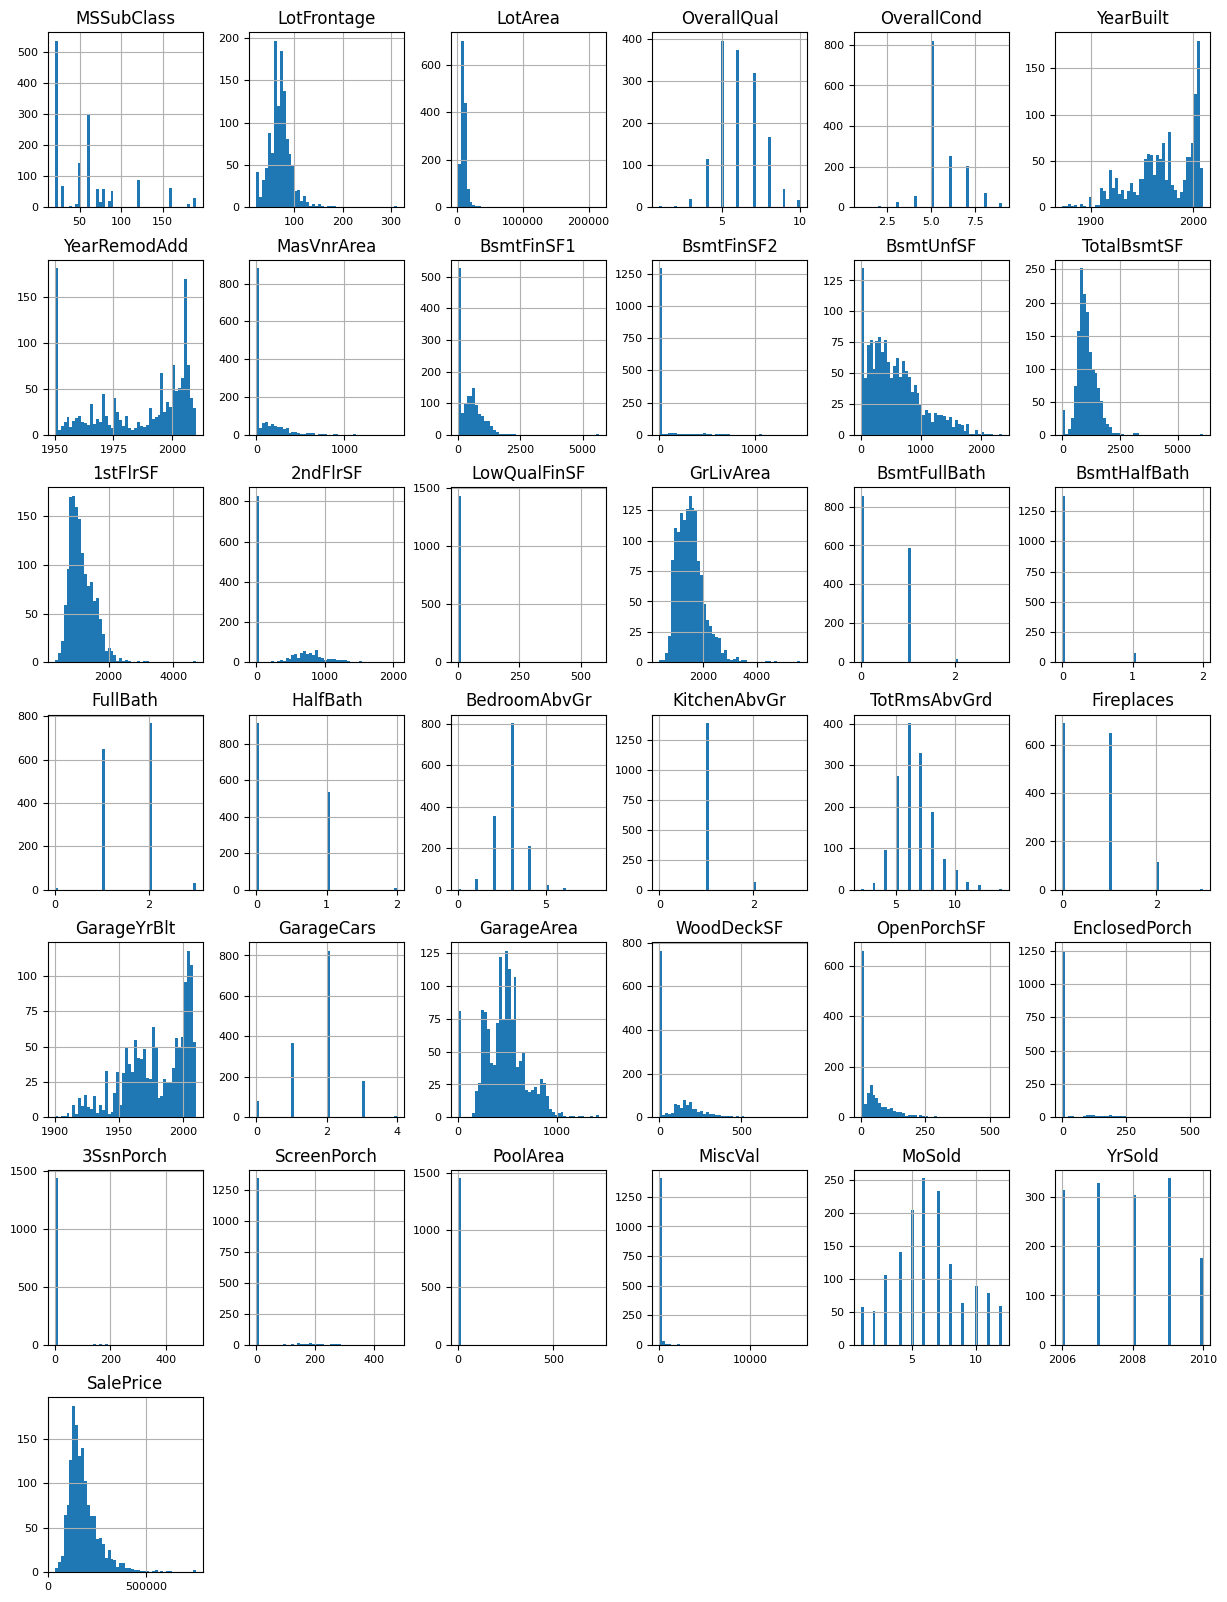

In [ ]:
numerical_data.hist(figsize=(15,20),bins=48,xlabelsize=8,ylabelsize=8)

# **PREPARING THE DATA**

In [ ]:
#splitting the dataset
import numpy as np
def split_data(dataset,test_ratio=0.3):
  test_indices = np.random.rand(len(dataset))<test_ratio
  return dataset[~test_indices],dataset[test_indices]


In [ ]:
train_ds_pd, valid_ds_pd = split_data(train_data_df)
print("{}examples in training,{}examples in testing.".format(len(train_ds_pd),len(valid_ds_pd)))


980examples in training,480examples in testing.


In [ ]:
#converting into Tensor flow datasets from pd data format
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd,label=label,task = tfdf.keras.Task.REGRESSION) #we are mentioning the task as regression since random forest is usually used for classification
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd,label=label,task= tfdf.keras.Task.REGRESSION )

In [ ]:
#Getting the list of all models
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
#Creating a Random Forest Model
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmp4b71wg2a as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:09.776101. Found 980 examples.
Training model...
Model trained in 0:00:03.064652
Compiling model...
Model compiled.


In [ ]:
#Visualizing the model
tfdf.model_plotter.plot_model_in_colab(rf,tree_idx=0,max_depth=4)

# **EVALUATING THE MODEL VIA OUT OF BAG DATA AND VALIDATION DATASET**

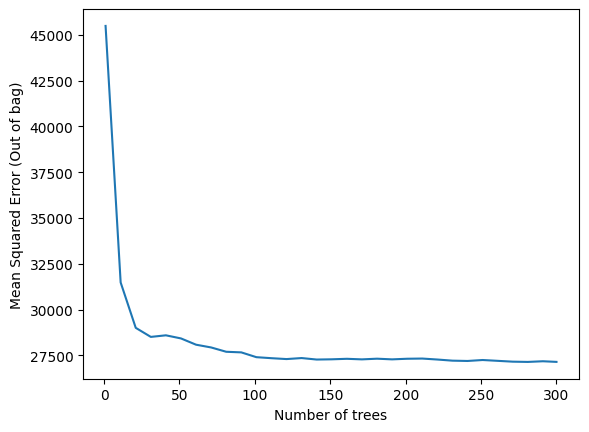

In [ ]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],[log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Mean Squared Error (Out of bag)")
plt.show()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=980, accuracy=None, loss=None, rmse=27149.65139168762, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
#Running an evaluation via the validation dataset
evaluation = rf.evaluate(x=valid_ds,return_dict=True)
for name,value in evaluation.items():
  print(f"{name}:{value:.4f}")


1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - mse: 1172546304.0000
loss:0.0000
mse:1172546304.0000


In [ ]:
#Variable Importance
print(f"Available variable importances :")
for importance in inspector.variable_importances().keys():
  print("\t",importance)

Available variable importances :
	 NUM_AS_ROOT
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE


In [ ]:
#Display the important features under the variable importance : NUM_AS_ROOT
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 100.0),
 ("ExterQual" (4; #22), 60.0),
 ("Neighborhood" (4; #59), 42.0),
 ("YearBuilt" (1; #76), 29.0),
 ("GarageCars" (1; #32), 23.0),
 ("GrLivArea" (1; #38), 13.0),
 ("KitchenQual" (4; #44), 13.0),
 ("BsmtQual" (4; #14), 10.0),
 ("TotalBsmtSF" (1; #73), 4.0),
 ("GarageArea" (1; #31), 3.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("GarageYrBlt" (1; #37), 1.0)]

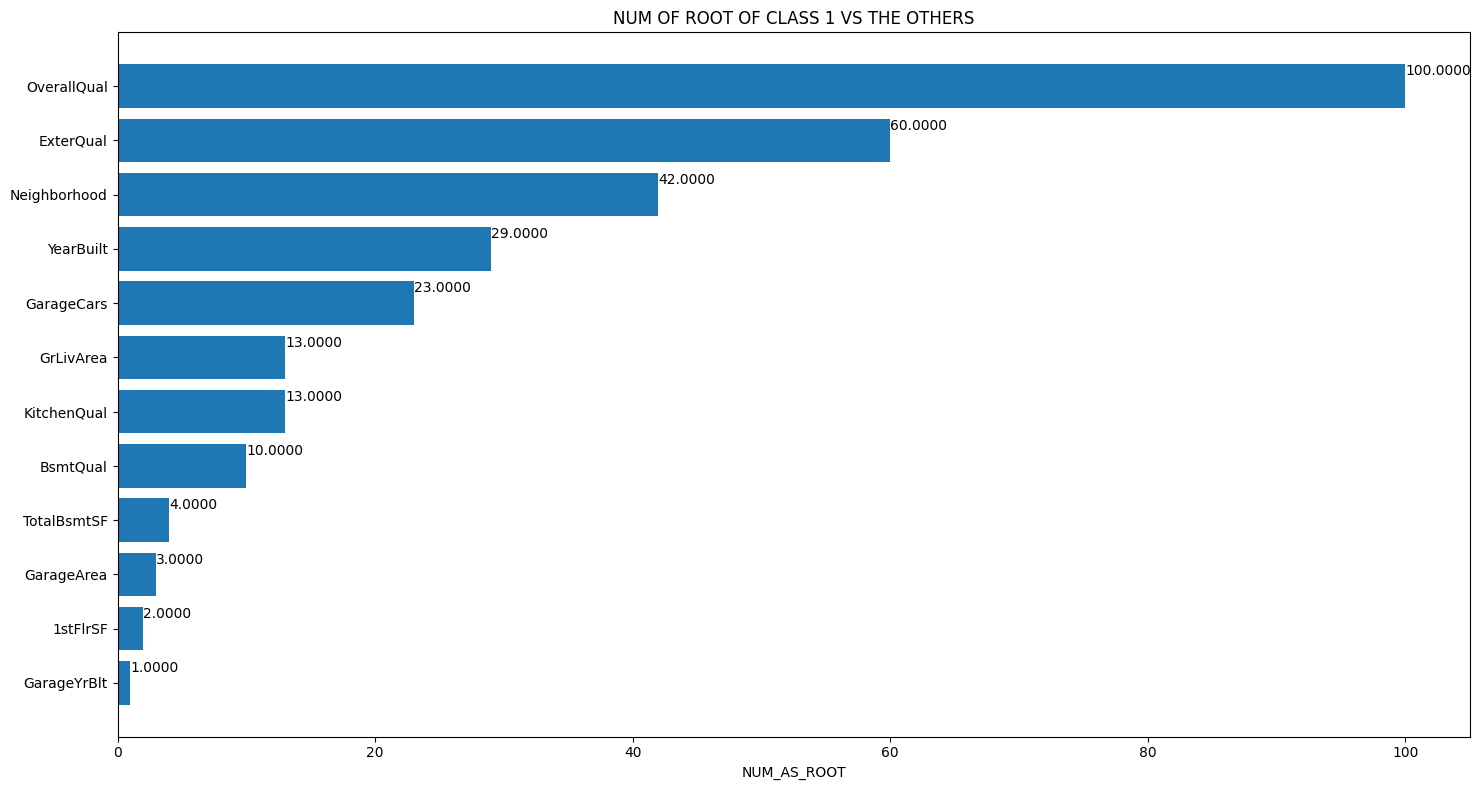

In [ ]:
#Plotting variable importances from the inspector
plt.figure(figsize=(15,8))
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

#Extracting feature names and importance values
feature_names= [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
feature_ranks = range(len(feature_names))
#bar plot
bar = plt.barh(feature_ranks,feature_importances,label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks,feature_names)
plt.gca().invert_yaxis()

#Labelling each bar with values
for importance, patch in zip(feature_importances,bar.patches):
  plt.text(patch.get_x()+patch.get_width(),patch.get_y(),f"{importance:.4f}",va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM OF ROOT OF CLASS 1 VS THE OTHERS")
plt.tight_layout()
plt.show()

# **Predicting** **using the test data**


In [ ]:
#Predicting using the test data
test_data = pd.read_csv('/content/test.csv')
ids = test_data.pop('Id')
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset( test_data,task = tfdf.keras.Task.REGRESSION)
preds = rf.predict(test_dataset)
output = pd.DataFrame({'Id':ids,'SalePrice':preds.squeeze()})
output.head()

2/2 [==============================] - 1s 54ms/step


,Id,SalePrice
0,1461,126732.164062
1,1462,155658.406250
2,1463,179718.390625
3,1464,182627.343750
4,1465,203323.562500
